# Accessing Planette's ERA5 Archive on AWS

This tutorial demonstrates how to access and analyze Planette's cloud-native ERA5 archive stored in Zarr format on AWS S3 using Python tools such as `xarray`, `zarr`, and `s3fs`. The data is chunked with [icechunk](https://github.com/earth-mover/icechunk) for efficient cloud-native access.


<img src="planette_icon.png" width=5000px height=150px />


## Prerequisites

Install the required packages if you haven't already:

```bash
pip install xarray zarr icechunk matplotlib s3fs
```


## 1. Import Libraries


In [14]:
import xarray as xr
import icechunk as ic
import matplotlib.pyplot as plt
import numpy as np

## 2. Define Zarr store path

The data is publicly accessible, so you do not need AWS credentials.


In [15]:
# get the bucket and prefix
variable = "t2m"  # 2-meter temperature (K)
frequency = "7day"  # daily means
bucket = "planette-era5"
prefix = f"era5/{variable}/{frequency}/0p25latx0p25lon/era5_{variable}_{frequency}_0p25latx0p25lon.zarr"
print(prefix)


era5/t2m/7day/0p25latx0p25lon/era5_t2m_7day_0p25latx0p25lon.zarr


## 3. Get icechunk session and repo

Data is stored in Zarr format and is written with icechunk. To open data, you must use icechunk session and repo.


In [16]:
# get storage and repo for icechunk
storage = ic.s3_storage(bucket=bucket, prefix=prefix, from_env=True)
repo = ic.Repository.open(storage=storage)

# return readonly session
session = repo.readonly_session("main")


## 4. Open the Dataset with Xarray

### Here are a few details about the data:
1. Data is organized by variable and temporal aggregation (daily, 7-day, 30-day, 90-day, monthly, 3-month)
2. Each variable has its own Zarr store
3. Data spans from 1940 to present
4. Global coverage at 0.25°×0.25° resolution
5. Data is chunked optimally for cloud access using icechunk


In [17]:
# open dataset
ds = xr.open_dataset(session.store, engine="zarr", consolidated=False, decode_timedelta=True, chunks={})
ds

<xarray.Dataset> Size: 130GB
Dimensions:  (lat: 721, time: 31356, lon: 1440)
Coordinates:
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time     (time) datetime64[ns] 251kB 1940-01-01 1940-01-02 ... 2025-11-05
  * lon      (lon) float64 12kB -179.8 -179.5 -179.2 ... 179.5 179.8 180.0
Data variables:
    t2m      (time, lat, lon) float32 130GB dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>

## 5. Basic Plot


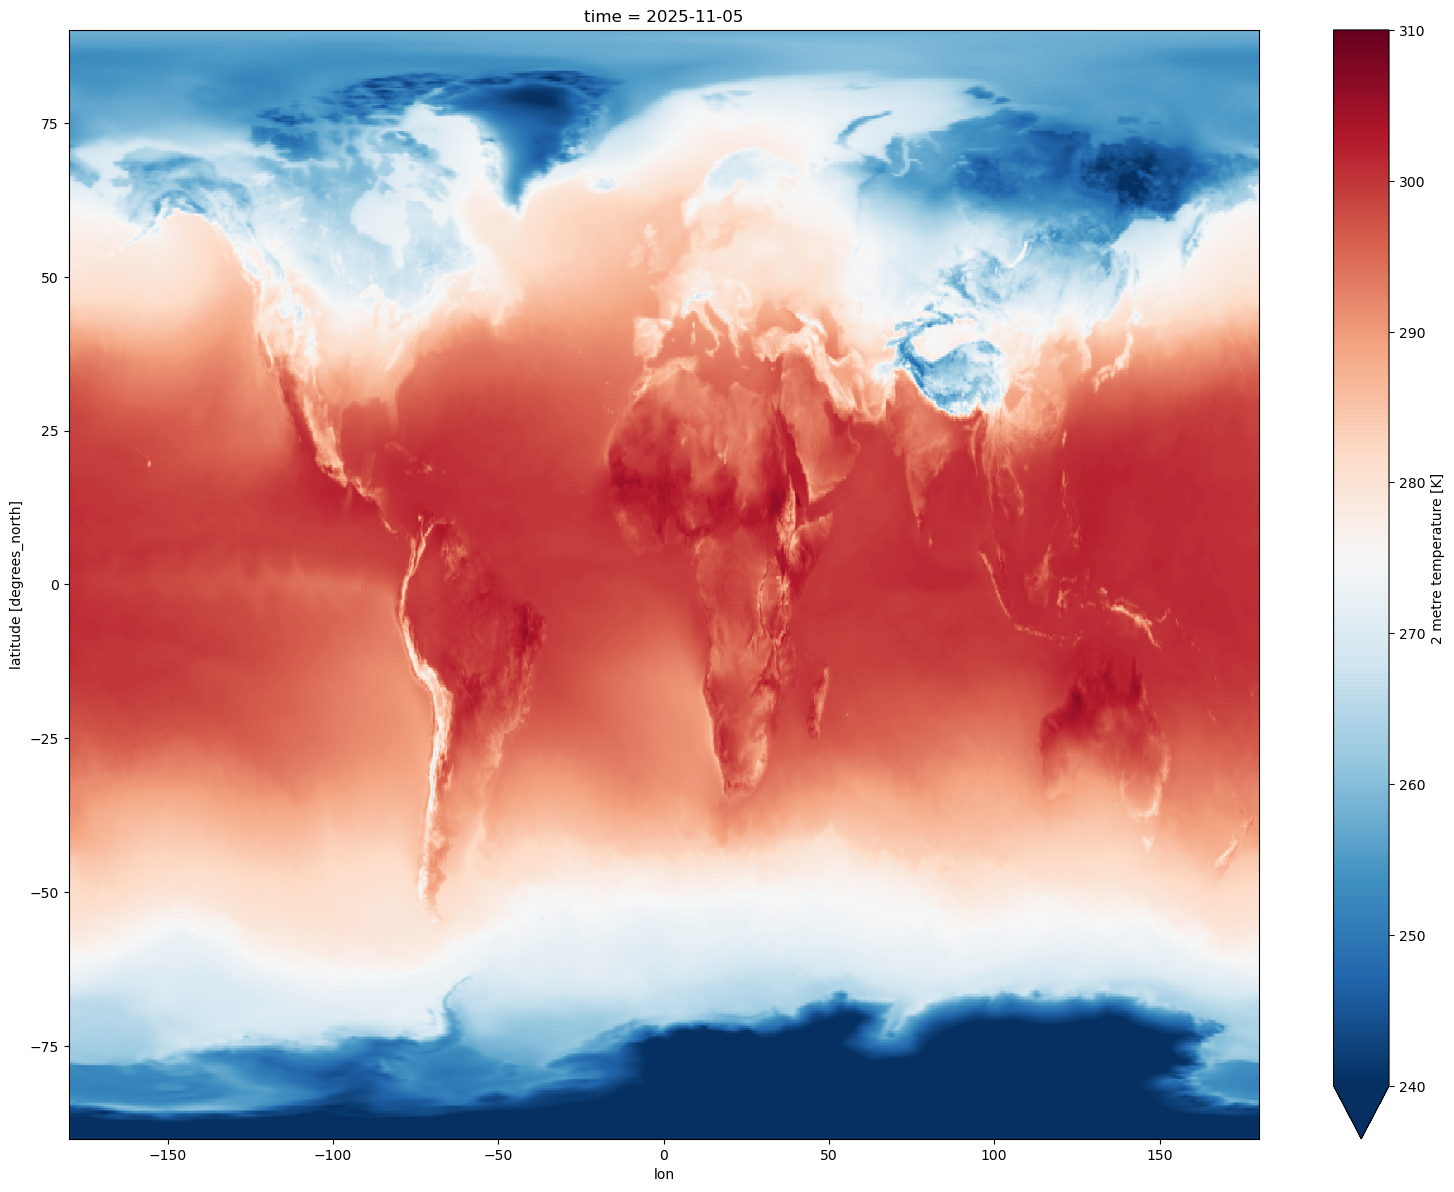

In [23]:
era5_planette = ds['t2m'].isel(time=-1)
import matplotlib.pyplot as plt
plt.figure(figsize=(19.2, 14.4))  # 3x default 6.4"x4.8"
era5_planette.plot(cmap='RdBu_r', vmin=240, vmax=310)

plt.show()

## Conclusion

This tutorial demonstrated how to:
1. Access Planette's ERA5 archive using xarray and icechunk
2. Work with the daily mean version of ERA5
3. Analyze and visualize 2 meter temperature (t2m)
4. Plot the data

For more information about the dataset, please refer to the [README.md](README.md) file in this repository.

### Additional Resources
- [ERA5 Documentation](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation)
- [xarray Documentation](http://xarray.pydata.org/)
- [zarr Documentation](https://zarr.readthedocs.io/)
- [icechunk Documentation](https://github.com/earth-mover/icechunk)
